In [25]:
import sys
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
FONTSIZE=20

In [26]:
# set plotting parameters
COLORS = {'a':'#117733', 
          'b':'#96CAA7',
          'lr':'#88CCEE',#882255
          'svm':'#CC6677',
          'optimal': '#D6BF4D',
          'feature_1':'#882255', #332288
          'people':'#882255', #AA4499',
          'stats':'#44AA99', 
          'feature_2':'#44AA99',
          'simple_grammar_constrained_noncompositonal':'#EF9EBB',
          'feature_3':'#E2C294', #'#0571D0', 
          'metal':'#DA9138', #"#D55E00", 
          'people2': '#748995',
          'metal2': '#173b4f'
          }
FONTSIZE=20

## compare model fits



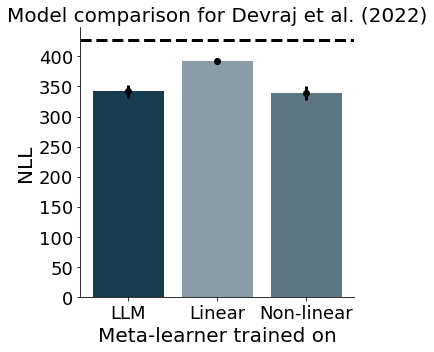

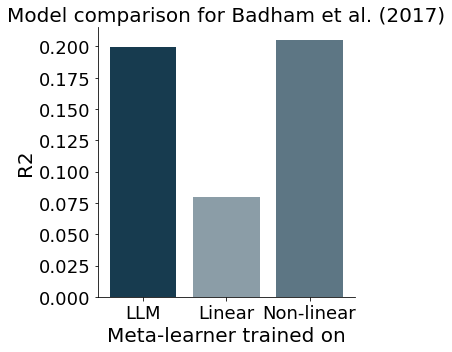

In [90]:
models = ['devraj2022_env=claude_generated_tasks_paramsNA_dim6_data500_tasks12910_pversion5_stage2_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=1_beta_sweep', \
         'devraj2022_env=dim6synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_synthetic_beta_sweep', \
         'devraj2022_env=dim6synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_syntheticnonlinear_beta_sweep']
nlls,fitted_betas, r2s = [], [], []
model_accs = []
for model_name in models:
    fits =  np.load(f'../model_comparison/{model_name}.npz')
    betas, pnlls, pr2s = fits['betas'], fits['nlls'], fits['pr2s']
    pr2s = np.array(pr2s)
    min_nll_index = np.argmin(np.stack(pnlls), 0)
    pr2s_min_nll = np.stack([pr2s[min_nll_index[idx], idx] for idx in range(pr2s.shape[1])])
    nlls_min_nlls = np.stack([pnlls[min_nll_index[idx], idx] for idx in range(pnlls.shape[1])])
    nlls.append(nlls_min_nlls)
    r2s.append(pr2s_min_nll)
    fitted_betas.append(betas[min_nll_index])
    model_accs.append(fits['accs'].max(0).mean())

num_participants = len(nlls[0])
# compare mean nlls across models in a bar plot
f, ax = plt.subplots(1, 1, figsize=(5,5))
bar_positions = np.arange(len(nlls))*0.5
colors = ['#173b4f', '#8b9da7', '#5d7684']
ax.bar(bar_positions, np.array(nlls).mean(1), color=colors, width=0.4)
ax.errorbar(bar_positions, np.array(nlls).mean(1), yerr=np.array(nlls).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
# add chance level line for 616 trials with binary choices
ax.axhline(y=-np.log(0.5)*616, color='k', linestyle='--', lw=3)
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('NLL', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(['LLM', 'Linear', 'Non-linear'], fontsize=FONTSIZE-2)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for Devraj et al. (2022)', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

num_participants = len(nlls[0])
# compare mean nlls across models in a bar plot
f, ax = plt.subplots(1, 1, figsize=(5,5))
bar_positions = np.arange(len(nlls))*0.5
# colors = ['#173b4f', '#8b9da7', '#5d7684']
# ax.bar(bar_positions, np.array(r2s).mean(1), color=colors, width=0.4)
# ax.errorbar(bar_positions, np.array(r2s).mean(1), yerr=np.array(r2s).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
ax.bar(bar_positions, 1-(np.array(nlls).mean(1)/(-np.log(0.5)*616)), color=colors, width=0.4)
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('R2', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(['LLM', 'Linear', 'Non-linear'], fontsize=FONTSIZE-2)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for Badham et al. (2017)', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

In [91]:
model_accs

[0.93912333, 0.715882, 0.9327651]

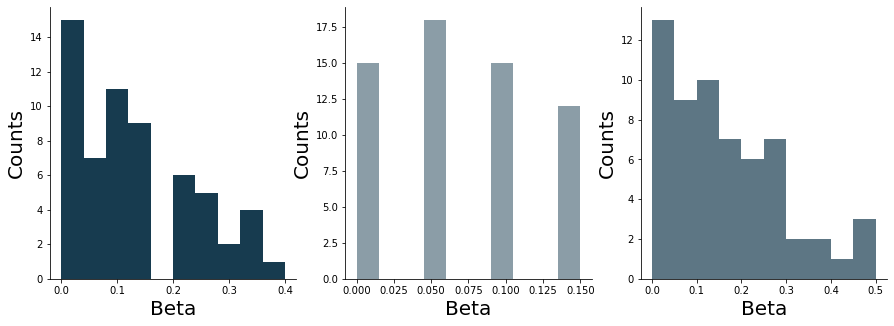

In [92]:
f, ax = plt.subplots(1, len(models), figsize=(15,5))
colors = ['#173b4f', '#8b9da7', '#5d7684']
for m_idx, model in enumerate(models):
    ax[m_idx].hist(fitted_betas[m_idx], color=colors[m_idx])
    ax[m_idx].set_xlabel('Beta', fontsize=FONTSIZE)
    ax[m_idx].set_ylabel('Counts', fontsize=FONTSIZE)
    sns.despine()

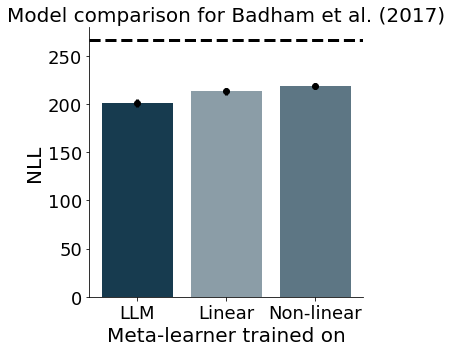

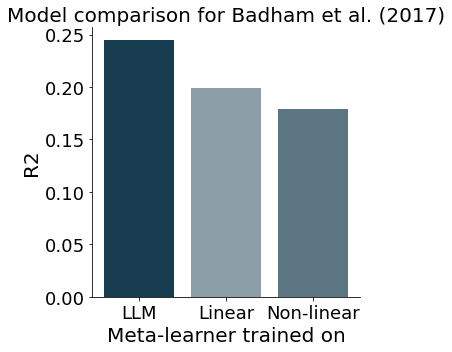

In [63]:
models = ['badham2017_env=claude_generated_tasks_paramsNA_dim3_data100_tasks11518_pversion4_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_beta_sweep',\
            'badham2017_env=dim3synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_syntheticnonlinear_beta_sweep', \
            'badham2017_env=dim3synthetic_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_synthetic_beta_sweep']
nlls,fitted_betas, r2s = [], [], []
model_accs = []
for model_name in models:
    fits =  np.load(f'../model_comparison/{model_name}.npz')
    betas, pnlls, pr2s = fits['betas'], fits['nlls'], fits['pr2s']
    pr2s = np.array(pr2s)
    min_nll_index = np.argmin(np.stack(pnlls), 0)
    pr2s_min_nll = np.stack([pr2s[min_nll_index[idx], idx] for idx in range(pr2s.shape[1])])
    nlls_min_nlls = np.stack([pnlls[min_nll_index[idx], idx] for idx in range(pnlls.shape[1])])
    nlls.append(nlls_min_nlls)
    r2s.append(pr2s_min_nll)
    fitted_betas.append(betas[min_nll_index])
    model_accs.append(fits['accs'].max(0).mean())

num_participants = len(nlls[0])
# compare mean nlls across models in a bar plot
f, ax = plt.subplots(1, 1, figsize=(5,5))
bar_positions = np.arange(len(nlls))*0.5
colors = ['#173b4f', '#8b9da7', '#5d7684']
ax.bar(bar_positions, np.array(nlls).mean(1), color=colors, width=0.4)
ax.errorbar(bar_positions, np.array(nlls).mean(1), yerr=np.array(nlls).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
# add chance level line for 96*4=384 trials with binary choices
ax.axhline(y=-np.log(0.5)*384, color='k', linestyle='--', lw=3)
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('NLL', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(['LLM', 'Linear', 'Non-linear'], fontsize=FONTSIZE-2)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for Badham et al. (2017)', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

num_participants = len(nlls[0])
# compare mean nlls across models in a bar plot
f, ax = plt.subplots(1, 1, figsize=(5,5))
bar_positions = np.arange(len(nlls))*0.5
# colors = ['#173b4f', '#8b9da7', '#5d7684']
# ax.bar(bar_positions, np.array(r2s).mean(1), color=colors, width=0.4)
# ax.errorbar(bar_positions, np.array(r2s).mean(1), yerr=np.array(r2s).std(1)/np.sqrt(num_participants-1), c='k', lw=3, fmt="o")
ax.bar(bar_positions, 1-(np.array(nlls).mean(1)/(-np.log(0.5)*384)), color=colors, width=0.4)
ax.set_xlabel('Meta-learner trained on', fontsize=FONTSIZE)
ax.set_ylabel('R2', fontsize=FONTSIZE)
ax.set_xticks(bar_positions)  # Set x-tick positions to bar_positions
ax.set_xticklabels(['LLM', 'Linear', 'Non-linear'], fontsize=FONTSIZE-2)  # Assign category names to x-tick labels
ax.set_title(f'Model comparison for Badham et al. (2017)', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

In [87]:
model_accs

[0.96871024, 0.83628553, 0.7659152]

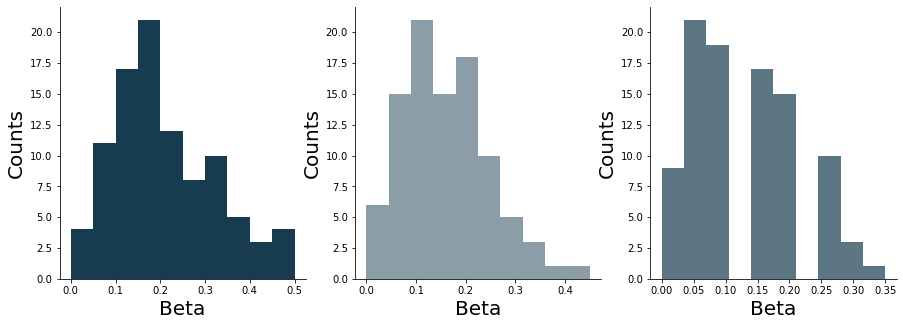

In [88]:
f, ax = plt.subplots(1, len(models), figsize=(15,5))
colors = ['#173b4f', '#8b9da7', '#5d7684']
for m_idx, model in enumerate(models):
    ax[m_idx].hist(fitted_betas[m_idx], color=colors[m_idx])
    ax[m_idx].set_xlabel('Beta', fontsize=FONTSIZE)
    ax[m_idx].set_ylabel('Counts', fontsize=FONTSIZE)
    sns.despine()

In [15]:
fits =  np.load('../model_comparison/badham2017_env=claude_generated_tasks_paramsNA_dim3_data100_tasks11518_pversion4_model=transformer_num_episodes500000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_run=0_beta_sweep.npy.npz')

In [16]:
betas, nlls, pr2s = fits['betas'], fits['nlls'], fits['pr2s']
pr2s = np.array(pr2s)
min_nll_index = np.argmin(np.stack(nlls), 0)
pr2s_min_nll = np.stack([pr2s[min_nll_index[idx], idx] for idx in range(pr2s.shape[1])])
nlls_min_nlls = np.stack([nlls[min_nll_index[idx], idx] for idx in range(nlls.shape[1])])

In [17]:
print(f"beta with min nll: {betas[min_nll_index]}")

beta with min nll: [0.15 0.15 0.1  0.35 0.7  0.65 0.75 0.   0.4  0.75 0.75 0.7  0.85 0.3
 0.75 0.4  0.45 0.95 0.45 0.65 0.9  0.05 0.7  0.3  0.35 0.4  0.9  0.8
 0.8  0.05 0.85 0.25 0.5  0.25 0.5  0.95 0.85 0.2  0.35 0.75 0.8  0.75
 0.85 0.4  0.45 0.85 0.95 0.75 0.65 0.35 0.   0.05 0.85 0.65 0.9  0.1
 0.2  0.   0.1  0.75 0.85 0.7  0.4  0.25 0.5  0.   0.35 0.4  0.25 0.
 0.2  0.2  0.8  0.15 0.95 0.   0.25 0.75 0.7  0.55 0.1  0.55 0.4  0.15
 0.85 0.05 0.9  0.25 0.9  0.95 0.75 0.6  0.95 0.65 0.7 ]


In [33]:
nlls_min_nlls.mean()

229.36994227582687

## prepare badham2017deficits

In [3]:
data = pd.read_csv('../data/human/badham2017deficits.csv')

In [23]:
participant = 0
task_type = 1
categories = {'j': 0, 'f': 1}

In [19]:
data_participant = data[data['participant']==participant]

In [24]:
choices = data_participant[data_participant.condition==task_type].choice

In [25]:
targets = np.array([1. if choice=='j' else 0. for choice in choices])

In [26]:
targets

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.])

In [21]:
input_features = [eval(val) for val in data_participant[data_participant.condition==task_type].all_features.values]

In [ ]:
choice = categories[df_trial.choice.item()] if df_trial.choice.item() in categories else df_trial.choice.item()
true_choice = categories[df_trial.correct_choice.item()] if df_trial.correct_choice.item() in categories else df_trial.correct_choice.item()
  